### Objetivo general: 

Evaluar si el nuevo sistema de recomendaciones mejora significativamente la conversión del embudo de compra, garantizando al mismo tiempo la validez del experimento mediante un análisis integral de datos, embudos y pruebas estadísticas.

### Objetivos específicos:
1. Analizar el comportamiento de los usuarios a lo largo del embudo de conversión.
2. Evaluar el impacto del nuevo sistema de recomendaciones.
3. Aplicar pruebas estadísticas para validad las diferencias.
4. Identificar anomalías o particularidades en los datos que puedan afectar los resultados.

### Importar librerias

In [377]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import statistics 
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from datetime import timedelta
from statsmodels.stats.proportion import proportions_ztest

### Cargue y verificación de los datos

In [378]:
mktg_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
user_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [379]:
display(mktg_events.head(10))

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [380]:
print(mktg_events.describe(),"\n\n\n")
mktg_events.info()

                           name regions    start_dt   finish_dt
count                        14      14          14          14
unique                       14       6          14          14
top     Single's Day Gift Promo    APAC  2020-05-01  2020-07-11
freq                          1       4           1           1 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [381]:
display(user_events.head(10))

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [382]:
print(user_events.describe(),"\n\n\n")
user_events.info()

            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [383]:
display(new_users.head(10))

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


In [384]:
print(new_users.describe(),"\n\n\n")
new_users.info()

                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     43DD2B79A130A949  2020-12-21     EU  Android
freq                   1        6077  43396    26159 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [385]:
display(participants.head(10))

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


In [386]:
print(participants.describe(),"\n\n\n")
participants.info()

                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     E40FA02A8A53F693      A  interface_eu_test
freq                   2   8214              10850 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [387]:
participants.groupby(['group', 'ab_test'])['user_id'].count()

group  ab_test                
A      interface_eu_test          5467
       recommender_system_test    2747
B      interface_eu_test          5383
       recommender_system_test     928
Name: user_id, dtype: int64

#### Conclusiones y comentarios:
El dataset de promotion event timeline no será útil porque no es posible identificar qué usuarios pertenecen a cada evento. En su lugar, usaré el dataset de new users para analizar regiones y tipos de dispositivo, lo que me permitirá identificar qué usuarios de la UE participaron en la prueba A/B. 

Con el dataset de events construiré los embudos de conversión para todos los usuarios, y finalmente, el dataset de A/B users me permitirá clasificar cada evento según el grupo experimental al que pertenece.

### Preprocesamiento de datos

#### Verificación de datos nulos

In [388]:
mktg_events.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [389]:
user_events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [390]:
user_events[user_events.isnull().any(axis=1)]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [391]:
new_users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [392]:
participants.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

#### Verificación de datos duplicados

In [393]:
mktg_events.duplicated().sum()

0

In [394]:
user_events.duplicated().sum()

0

In [395]:
new_users.duplicated().sum()

0

In [396]:
participants.duplicated().sum()

0

##### ab_project_marketing_events_us.csv

In [397]:
# Modificación del tipo de fechas
mktg_events['start_dt']= pd.to_datetime(mktg_events['start_dt'])
mktg_events['finish_dt']= pd.to_datetime(mktg_events['finish_dt'])

mktg_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


##### final_ab_events_upd_us.csv

In [398]:
#Modificación de tipos de datos
user_events['event_dt']= pd.to_datetime(user_events['event_dt'], format='%Y-%m-%d %H:%M:%S')
user_events['event_name'] = user_events['event_name'].astype('category')
user_events['details'] = user_events['details'].apply(lambda x: round(x, 2))
user_events = user_events.drop(columns=['details'])
user_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 6.9+ MB


##### final_ab_new_users_upd_us.csv

In [399]:
# Modificación de tipo de fechas
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

#validación de valores únicos x columna
print(new_users['region'].unique())
new_users['device'].unique()

['EU' 'N.America' 'APAC' 'CIS']


array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [400]:
#Modificación de tipos de datos
new_users['region'] = new_users['region'].astype('category')
new_users['device'] = new_users['device'].astype('category')
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  category      
 3   device      58703 non-null  category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.0+ MB


##### final_ab_participants_upd_us.csv

In [401]:
#Modificación de tipos de datos
participants['group'] = participants['group'].astype('category')
participants['ab_test'] = participants['ab_test'].astype('category')
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  14525 non-null  object  
 1   group    14525 non-null  category
 2   ab_test  14525 non-null  category
dtypes: category(2), object(1)
memory usage: 142.2+ KB


#### Conclusiones y comentarios
1. ¿Es necesario convertir los tipos?
Con el fin de evitar ambiguedades o problemas con procesos futuros, se modifican el tipo de dato en la mayoría de bases de datos con el fin de obtener procesos y análisis prolijos. Se modifican los tipos de fechas y algunas variables se marcan como categóricas.
2. ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?
- NO valores duplicados para ninguna base de datos.
- Se encuentran valores nulos en la base de datos *'final_ab_events_upd_us.csv'*. La razón por la cual observamos estos valores nulos, se deben a que la información no está completa en el estudio. Tras llevar a cabo una inspección, eliminamos la columna "Detail" dado que su impacto en el estudio no es nulo.
  

### EDA

In [402]:
#número de personas que poseen sesiones diarias, semanales, mensuales y anuales.
user_events['session_date'] = user_events['event_dt'].dt.date
user_events['session_year']  = user_events['event_dt'].dt.year
user_events['session_month'] = user_events['event_dt'].dt.month
user_events['session_week']  = user_events['event_dt'].dt.week
user_events['start_day'] = user_events['event_dt'].dt.day
display(user_events)

,user_id,event_dt,event_name,session_date,session_year,session_month,session_week,start_day
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,2020-12-07,2020,12,50,7
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,2020-12-07,2020,12,50,7
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,2020-12-07,2020,12,50,7
3,96F27A054B191457,2020-12-07 04:02:40,purchase,2020-12-07,2020,12,50,7
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,2020-12-07,2020,12,50,7
...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,2020-12-30,2020,12,53,30
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,2020-12-30,2020,12,53,30
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,2020-12-30,2020,12,53,30
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,2020-12-30,2020,12,53,30


In [403]:
#Calcular el DAU, WAU & MAU
dau_total = user_events.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau_total = user_events.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).mean()
mau_total = user_events.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'}).mean()

print('Users per Day', int(dau_total))
print('Users per Week', int(wau_total))
print('Users per Month',int(mau_total))

Users per Day 7940
Users per Week 26396
Users per Month 58703


In [404]:
daily_sessions_total = user_events.groupby('session_date').agg({'user_id':'count'}).mean()
print('Average sessions daily:', int(daily_sessions_total))

Average sessions daily: 18424


In [405]:
# Unión de eventos con usuarios nuevos
eventandnew = user_events.merge(new_users, on='user_id', how = 'left')
display(eventandnew.head(10))

,user_id,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,2020-12-07,2020,12,50,7,2020-12-07,N.America,Mac
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android


In [406]:
# Unión de nuevos usuarios y AB test
eventparticipants = participants.merge(eventandnew, on='user_id', how = 'left')
display(eventparticipants.head(10))

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone
5,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:59,product_page,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone
6,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:02,login,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone
7,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:58,login,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone
8,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08 11:30:58,login,2020-12-08,2020,12,50,8,2020-12-08,EU,Mac
9,DABC14FDDFADD29E,A,recommender_system_test,2020-12-11 12:52:32,login,2020-12-11,2020,12,50,11,2020-12-08,EU,Mac


In [407]:
reccomenderdata= eventparticipants.query('ab_test == "recommender_system_test"')

In [408]:
dau_total = reccomenderdata.groupby('session_date').agg({'user_id': 'nunique'}).mean()
print('Average Daily Usage:', int(dau_total))

Average Daily Usage: 471


In [409]:
reccomenderdata = reccomenderdata.copy()

#Columna fecha
reccomenderdata['date'] = reccomenderdata['event_dt'].dt.date
reccomenderdata

# Columna tiempo
reccomenderdata['time'] = reccomenderdata['event_dt'].dt.time
eventandnew

,user_id,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
...,...,...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,2020-12-30,2020,12,53,30,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,2020-12-30,2020,12,53,30,2020-12-07,EU,iPhone


In [410]:
users = reccomenderdata.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='time',
    aggfunc='min')
users.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,03:19:15,NaN,03:19:17,NaN
0010A1C096941592,04:34:37,NaN,04:34:38,04:34:37
00341D8401F0F665,11:14:50,NaN,NaN,NaN
003DF44D7589BBD4,00:54:43,00:54:43,00:54:44,NaN
00505E15A9D81546,05:35:34,NaN,NaN,NaN


In [411]:
# Conversión en diferentes etapas del embudo
ExpIdbyDate = reccomenderdata.pivot_table(index='event_name', values='user_id',aggfunc='nunique')
ExpIdbyDate.sort_values(by='user_id',ascending=False)

,user_id
event_name,
login,3674
product_page,2303
purchase,1128
product_cart,1079


In [412]:
users = reccomenderdata.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='time',
    aggfunc='min')
users.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,03:19:15,NaN,03:19:17,NaN
0010A1C096941592,04:34:37,NaN,04:34:38,04:34:37
00341D8401F0F665,11:14:50,NaN,NaN,NaN
003DF44D7589BBD4,00:54:43,00:54:43,00:54:44,NaN
00505E15A9D81546,05:35:34,NaN,NaN,NaN


In [413]:
#Estudiar la conversión en las diferentes etapas del embudo
step_1 = ~users['login'].isna()
step_2 = step_1 & (users['product_page'] > users['login'])
step_3 = step_2 & (users['product_cart'] > users['product_page'])
step_4 = step_3 & (users['purchase'] > users['product_cart'])

n_login = users[step_1].shape[0]
n_productpage = users[step_2].shape[0]
n_cart = users[step_3].shape[0]
n_payment = users[step_4].shape[0]

conv_login_to_page = n_productpage / n_login
conv_page_to_cart = n_cart / n_productpage
conv_cart_to_payment = n_payment / n_cart

print('Usuarios que hicieron login:', n_login)
print('Usuarios que vieron producto:', n_productpage)
print('Conversión Login → Product Page:', round(conv_login_to_page * 100, 2), '%\n')

print('Usuarios que agregaron al carrito:', n_cart)
print('Conversión Product Page → Cart:', round(conv_page_to_cart * 100, 2), '%\n')

print('Usuarios que realizaron compra:', n_payment)
print('Conversión Cart → Purchase:', round(conv_cart_to_payment * 100, 2), '%')

Usuarios que hicieron login: 3674
Usuarios que vieron producto: 1289
Conversión Login → Product Page: 35.08 %

Usuarios que agregaron al carrito: 90
Conversión Product Page → Cart: 6.98 %

Usuarios que realizaron compra: 0
Conversión Cart → Purchase: 0.0 %


#### Conclusiones y comentarios
***Estudiar la conversión en las diferentes etapas del embudo.***

Al analizar el embudo de conversión de la prueba recommender_system_test, se observa una caída significativa en cada etapa.

De los usuarios del experimento, 3675 llegaron a la pantalla principal (72 %), pero solo 1294 avanzaron a la vista de productos (25 %). La transición a agregar al carrito fue mínima: apenas 91 usuarios (1 %). Finalmente, ningún usuario del grupo experimental completó una compra.

Este comportamiento indica que, aunque los usuarios mostraron cierto interés inicial, el embudo se rompe antes de la etapa de pago. 

En consecuencia, el impacto de la prueba y de las promociones asociadas fue muy limitado, generando una retención real inferior al 1 %.  

In [414]:
display(eventparticipants)

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,2020-12-23,2020,12,52,23,2020-12-20,EU,Android
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,2020-12-14,2020,12,51,14,2020-12-14,EU,PC
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,2020-12-15,2020,12,51,15,2020-12-14,EU,PC
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,2020-12-16,2020,12,51,16,2020-12-14,EU,PC


In [415]:
# ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
users_average= eventparticipants.groupby(['user_id']).agg({'event_name':'nunique'}).sum()
print('Average Users in logs:', int(users_average))

Average Users in logs: 31516


In [416]:
# Promedio de enventos por usuario
users_per_event = eventparticipants.groupby(['user_id']).agg({'event_name':'count'})
users_per_event.sort_values(by='event_name', ascending=False).head(20)

,event_name
user_id,
6B1D0D8C4F8FBBEC,40
84DC74ED5E60BA6A,40
0082295A41A867B5,40
2B8FD20CA8A2A616,40
18569C8DCB0771B6,40
9A5549A4A85FCF06,38
41FA2525E7869F35,36
A1C3D3C6C3CADDC5,36
B0244412983000C5,36


In [417]:
TotalEvents_PerUser = eventparticipants.groupby('user_id').agg({'event_name':'count'}).mean()

In [418]:
print('Promedio de eventos por usuario registrados:', round(TotalEvents_PerUser,2))

Promedio de eventos por usuario registrados: event_name    7.54
dtype: float64


In [419]:
# Periodos que cubren los datos
eventparticipants['duration_start'] = eventparticipants['event_dt'].min()
eventparticipants['duration_end'] = eventparticipants['event_dt'].max()
display(eventparticipants)

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,duration_start,duration_end
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-07 00:02:48,2020-12-30 18:28:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,2020-12-23,2020,12,52,23,2020-12-20,EU,Android,2020-12-07 00:02:48,2020-12-30 18:28:55
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,2020-12-14,2020,12,51,14,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,2020-12-15,2020,12,51,15,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,2020-12-16,2020,12,51,16,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55


In [420]:
eventparticipants['session_duration'] = (eventparticipants['duration_end'] - eventparticipants['duration_start'])
eventparticipants

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,duration_start,duration_end,session_duration
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,2020-12-23,2020,12,52,23,2020-12-20,EU,Android,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,2020-12-14,2020,12,51,14,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,2020-12-15,2020,12,51,15,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,2020-12-16,2020,12,51,16,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07


In [421]:
print("Average Session Length is:", eventparticipants['session_duration'].mean()) 
print(eventparticipants['session_duration'].value_counts(normalize=True).head(10))

Average Session Length is: 23 days 18:26:07
23 days 18:26:07    1.0
Name: session_duration, dtype: float64


#### Conclusiones y comentarios
***¿El número de eventos por usuario está distribuido equitativamente entre las muestras?***

El número de eventos por usuario no está distribuido de forma equitativa entre las muestras. Aunque el promedio general es de 7.5 eventos por usuario, existe una variabilidad considerable, con algunos usuarios registrando más de 30 eventos y otros apenas unos pocos. 

Esta desigualdad en la participación puede introducir sesgos y debe considerarse al interpretar los resultados del test A/B.

In [422]:
# ¿Hay usuarios que están presentes en ambas muestras?
eventusercount = eventparticipants.pivot_table(index='ab_test', values='user_id', aggfunc='count' )
eventusercount

,user_id
ab_test,
interface_eu_test,78929
recommender_system_test,23909


In [423]:
uniqueusers= eventparticipants.groupby(['ab_test']).agg({'user_id':'nunique'}).sum()
print('Unique Users in logs:', int(uniqueusers))

Unique Users in logs: 14525


In [424]:
# Promedio de eventos por usuario
users_per_event = eventparticipants.groupby(['user_id']).agg({'ab_test':'count'})
users_per_event.sort_values(by='ab_test', ascending=False).head(20)

,ab_test
user_id,
6B1D0D8C4F8FBBEC,40
84DC74ED5E60BA6A,40
0082295A41A867B5,40
2B8FD20CA8A2A616,40
18569C8DCB0771B6,40
9A5549A4A85FCF06,38
41FA2525E7869F35,36
A1C3D3C6C3CADDC5,36
B0244412983000C5,36


#### Conclusiones y comentarios
***¿Hay usuarios que están presentes en ambas muestras?***

Sí, existen usuarios que están presentes en ambas muestras. Esto se confirma porque el número total de usuarios únicos (14,525) es menor que la suma de usuarios únicos esperados si cada prueba hubiese tenido participantes completamente distintos. 

La superposición indica que algunos usuarios participaron en ambos experimentos, lo cual viola el diseño correcto de un test A/B y puede sesgar los resultados.

In [425]:
# ¿Cómo se distribuye el número de eventos entre los días?
users_per_event = eventparticipants.groupby(['event_name']).agg({'session_date':'count'})
users_per_event.sort_values(by='event_name', ascending=False).head(20)

,session_date
event_name,
purchase,14854
product_page,28961
product_cart,14318
login,44705


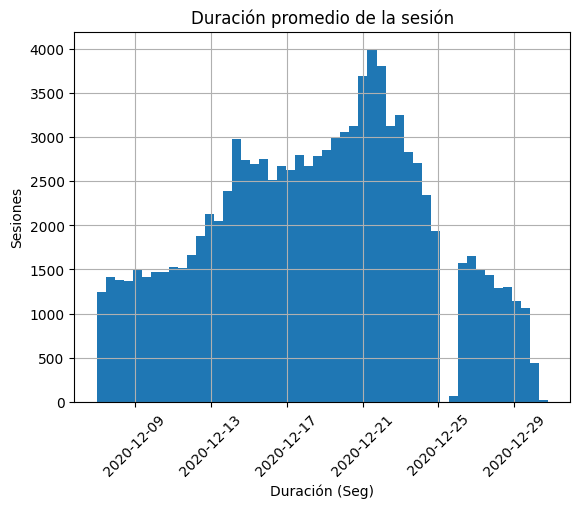

In [426]:
#distribución por el periodo de tiempo
eventparticipants['event_dt'].hist(bins=50)
plt.xticks(rotation=45)
plt.title("Duración promedio de la sesión")
plt.ylabel("Sesiones")
plt.xlabel("Duración (Seg)")
plt.show()

#### Conclusiones y comentarios
***¿Cómo se distribuye el número de eventos entre los días?***

1. Los eventos se concentran especialmente entre el 17 y el 22 de diciembre, donde se observa el mayor volumen de actividad. En ese intervalo, la frecuencia de eventos crece de manera consistente y alcanza su punto máximo.
2. Después del 22 de diciembre, la actividad comienza a disminuir progresivamente, con una caída marcada hacia el final de mes (27–29 de diciembre). Esto es visible en el histograma, donde los últimos días presentan muchos menos registros.
3. También se identifica que:
    * Los eventos de login son los más frecuentes (≈44k).
    * Las vistas de producto (product_page) y los agregados al carrito (product_cart) muestran números similares.
    * Los eventos de purchase son considerablemente menores.

En resumen, la distribución temporal sugiere que la actividad de los usuarios no fue uniforme durante el periodo del experimento, sino que se concentró en ciertos días, algo que debe considerarse antes de evaluar los resultados de la prueba A/B.

***¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?***

El EDA presenta una serie de anomlaías e irregularidades que pueden afectar drásticamente las pruebas A/B. Lo que se detecto fue lo siguiente:
1. *Usuarios presentes en ambas pruebas*
2. *Tamaño muestral incorrecto y mala asignación de usuarios*
3. *Distribución desigual de eventos entre usuarios*
4. *Concentración de eventos en pocos días*
5. *Embudo atípico*

### A/B test

In [427]:
# Nombre de los eventos (etiquetas para tabla de resumen)
def data_by_event_name(event_name):
    if event_name == 'login':
        return 'Logged_In'
    elif event_name == 'product_page':
        return 'Looked at Product'
    elif event_name == 'product_cart':
        return 'Cart'
    elif event_name == 'purchase':
        return 'Purchase'
    else:
        return 'Other'

# Crear columna evitando SettingWithCopyWarning
reccomenderdata.loc[:, 'days_to_order_group'] = reccomenderdata['event_name'].apply(data_by_event_name)

event_data_pivot = reccomenderdata.pivot_table(
    index='event_name',
    columns=['ab_test', 'group'],
    values='user_id',
    aggfunc='nunique',
    fill_value=0
)

display(event_data_pivot)

ab_test      interface_eu_test    recommender_system_test     
group                        A  B                       A    B
event_name                                                    
login                        0  0                    2747  927
product_cart                 0  0                     824  255
product_page                 0  0                    1780  523
purchase                     0  0                     872  256

In [428]:
# Nombre de los eventos
def data_by_event_name(event_name):
    """
    Labels users by number of days until first order.
    """
    if event_name == 'login':
        return 'Logged_In'
    if event_name == 'product_cart':
        return 'Cart'
    if event_name == 'product_page':
        return 'Looked at Product'
    else:
        return 'Purchase'


reccomenderdata['days_to_order_group'] = reccomenderdata['event_name'].apply(data_by_event_name)

event_data_pivot = reccomenderdata.pivot_table(index=['event_name', 'group'], columns='days_to_order_group', values='user_id', aggfunc='nunique', fill_value=0)
display(event_data_pivot)

days_to_order_group  Logged_In  Cart  Looked at Product  Purchase
event_name   group                                               
login        A            2747     0                  0         0
             B             927     0                  0         0
product_cart A               0   824                  0         0
             B               0   255                  0         0
product_page A               0     0               1780         0
             B               0     0                523         0
purchase     A               0     0                  0       872
             B               0     0                  0       256

In [429]:
# Usuarios que llegaron hasta el evento nombre "login"
userswhoperformedloginscreen =  reccomenderdata.query('event_name == "login"')
userswhoperformedloginscreen 

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Logged_In
6,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:02,login,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-20,15:46:02,Logged_In
7,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:58,login,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone,2020-12-21,00:40:58,Logged_In
8,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08 11:30:58,login,2020-12-08,2020,12,50,8,2020-12-08,EU,Mac,2020-12-08,11:30:58,Logged_In
9,DABC14FDDFADD29E,A,recommender_system_test,2020-12-11 12:52:32,login,2020-12-11,2020,12,50,11,2020-12-08,EU,Mac,2020-12-11,12:52:32,Logged_In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:15,Logged_In
23905,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Logged_In
23906,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:03,Logged_In
23907,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Logged_In


In [430]:
userswhoperformedloginscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()

,ab_test,user_id
0,interface_eu_test,0
1,recommender_system_test,10837


In [431]:
# Usuarios que llegaron hasta el evento nombre "product"
userswhoperformedproductscreen =  reccomenderdata.query('event_name == "product_page"')
userswhoperformedproductscreen 

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Looked at Product
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-20,15:46:06,Looked at Product
5,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:59,product_page,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone,2020-12-21,00:40:59,Looked at Product
15,04988C5DF189632E,A,recommender_system_test,2020-12-14 18:51:34,product_page,2020-12-14,2020,12,51,14,2020-12-14,EU,iPhone,2020-12-14,18:51:34,Looked at Product
16,04988C5DF189632E,A,recommender_system_test,2020-12-15 02:39:21,product_page,2020-12-15,2020,12,51,15,2020-12-14,EU,iPhone,2020-12-15,02:39:21,Looked at Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23899,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:16,product_page,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:16,Looked at Product
23900,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,product_page,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Looked at Product
23901,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:04,product_page,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:04,Looked at Product
23902,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,product_page,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Looked at Product


In [432]:
userswhoperformedproductscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()

,ab_test,user_id
0,interface_eu_test,0
1,recommender_system_test,6702


In [433]:
# Usuarios que llegaron hasta el evento nombre "product cart"
userswhoperformedcartscreen =  reccomenderdata.query('event_name == "product_cart"')
userswhoperformedcartscreen 

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:29,Cart
26,4FF2998A348C484F,A,recommender_system_test,2020-12-20 19:06:22,product_cart,2020-12-20,2020,12,51,20,2020-12-20,EU,Mac,2020-12-20,19:06:22,Cart
27,4FF2998A348C484F,A,recommender_system_test,2020-12-26 14:39:50,product_cart,2020-12-26,2020,12,52,26,2020-12-20,EU,Mac,2020-12-26,14:39:50,Cart
28,4FF2998A348C484F,A,recommender_system_test,2020-12-28 20:00:24,product_cart,2020-12-28,2020,12,53,28,2020-12-20,EU,Mac,2020-12-28,20:00:24,Cart
86,EAFB9027A27D510C,B,recommender_system_test,2020-12-07 15:20:06,product_cart,2020-12-07,2020,12,50,7,2020-12-07,EU,Android,2020-12-07,15:20:06,Cart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23894,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,product_cart,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:15,Cart
23895,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,product_cart,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Cart
23896,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:05,product_cart,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:05,Cart
23897,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,product_cart,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Cart


In [434]:
userswhoperformedcartscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()

,ab_test,user_id
0,interface_eu_test,0
1,recommender_system_test,3160


In [435]:
# Usuarios que llegaron hasta el evento nombre "checkout"
userswhoperformedpurchasescreen =  reccomenderdata.query('event_name == "purchase"')
userswhoperformedpurchasescreen

,user_id,group,ab_test,event_dt,event_name,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Purchase
11,04988C5DF189632E,A,recommender_system_test,2020-12-14 18:51:34,purchase,2020-12-14,2020,12,51,14,2020-12-14,EU,iPhone,2020-12-14,18:51:34,Purchase
12,04988C5DF189632E,A,recommender_system_test,2020-12-15 02:39:20,purchase,2020-12-15,2020,12,51,15,2020-12-14,EU,iPhone,2020-12-15,02:39:20,Purchase
13,04988C5DF189632E,A,recommender_system_test,2020-12-18 04:33:43,purchase,2020-12-18,2020,12,51,18,2020-12-14,EU,iPhone,2020-12-18,04:33:43,Purchase
14,04988C5DF189632E,A,recommender_system_test,2020-12-20 04:12:27,purchase,2020-12-20,2020,12,51,20,2020-12-14,EU,iPhone,2020-12-20,04:12:27,Purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,15E18335C5DB30C9,A,recommender_system_test,2020-12-19 11:19:31,purchase,2020-12-19,2020,12,51,19,2020-12-15,N.America,iPhone,2020-12-19,11:19:31,Purchase
23837,15E18335C5DB30C9,A,recommender_system_test,2020-12-21 21:22:10,purchase,2020-12-21,2020,12,52,21,2020-12-15,N.America,iPhone,2020-12-21,21:22:10,Purchase
23875,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10 04:03:07,purchase,2020-12-10,2020,12,50,10,2020-12-10,N.America,Android,2020-12-10,04:03:07,Purchase
23876,053FB26D6D49EDDC,A,recommender_system_test,2020-12-11 14:11:37,purchase,2020-12-11,2020,12,50,11,2020-12-10,N.America,Android,2020-12-11,14:11:37,Purchase


In [436]:
userswhoperformedpurchasescreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()

,ab_test,user_id
0,interface_eu_test,0
1,recommender_system_test,3210


In [437]:
#¿Cuál es el evento más popular entre las pruebas del sistema de recomendación?
pop_event = reccomenderdata.drop(['date'], axis=1).groupby('event_name', as_index=False).agg({'group' : 'count'})
display(pop_event)

,event_name,group
0,login,10837
1,product_cart,3160
2,product_page,6702
3,purchase,3210


In [438]:
#iltrado de usuarios por etapa del embudo
userswhoperformedloginscreen=  reccomenderdata.query('event_name == "login"')
userswhoperformedproductscreen =  reccomenderdata.query('event_name == "product_page"') 
userswhoperformedcartscreen =  reccomenderdata.query('event_name == "product_cart"')
userswhoperformedpurchasescreen =  reccomenderdata.query('event_name == "purchase"')

In [439]:
reccomenderdata.group.value_counts()

A    18627
B     5282
Name: group, dtype: int64

In [440]:
display(event_data_pivot)

days_to_order_group  Logged_In  Cart  Looked at Product  Purchase
event_name   group                                               
login        A            2747     0                  0         0
             B             927     0                  0         0
product_cart A               0   824                  0         0
             B               0   255                  0         0
product_page A               0     0               1780         0
             B               0     0                523         0
purchase     A               0     0                  0       872
             B               0     0                  0       256

In [441]:
usersamples = reccomenderdata.pivot_table(index='group', values='user_id',aggfunc='nunique')
usersamples.sort_values(by='user_id',ascending=False)

,user_id
group,
A,2747
B,928


In [442]:
# - PRE-TEST: Filtrar el experimento y controlar contaminación (usuarios en ambos grupos)

test_name = 'recommender_system_test'

# Filtrar solo el test objetivo
df_test = eventsparticipants[eventsparticipants['ab_test'] == test_name].copy()

# Identificar usuarios asignados a más de un grupo dentro del mismo test (contaminación)
contaminated_users = (
    df_test.groupby('user_id')['group']
    .nunique()
    .loc[lambda s: s > 1]
    .index
)

print('Usuarios contaminados (mismo test, múltiples grupos):', len(contaminated_users))

# Remover usuarios contaminados
df_clean = df_test[~df_test['user_id'].isin(contaminated_users)].copy()

print('Usuarios únicos antes:', df_test['user_id'].nunique())
print('Usuarios únicos después:', df_clean['user_id'].nunique())

# Separar muestras limpias
sample_A = df_clean[df_clean['group'] == 'A'].copy()
sample_B = df_clean[df_clean['group'] == 'B'].copy()

sample_A.head(10)


Usuarios contaminados (mismo test, múltiples grupos): 0
Usuarios únicos antes: 3675
Usuarios únicos después: 3675


,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,group,ab_test
12,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,2020,12,50,7,A,recommender_system_test
13,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,2020,12,50,9,A,recommender_system_test
14,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,2020,12,50,7,A,recommender_system_test
15,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,2020,12,50,8,A,recommender_system_test
16,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,2020,12,50,9,A,recommender_system_test
17,831887FE7F2D6CBA,2020-12-07 06:50:29,login,0.00,2020-12-07,2020,12,50,7,A,recommender_system_test
18,831887FE7F2D6CBA,2020-12-08 10:52:26,login,0.00,2020-12-08,2020,12,50,8,A,recommender_system_test
19,831887FE7F2D6CBA,2020-12-09 02:19:17,login,0.00,2020-12-09,2020,12,50,9,A,recommender_system_test
43,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,2020,12,50,7,A,recommender_system_test
44,3C5DD0288AC4FE23,2020-12-07 19:42:40,product_page,0.00,2020-12-07,2020,12,50,7,A,recommender_system_test


In [443]:
# Verificación de balance (tamaño de muestra por grupo)
balance = df_clean.groupby('group')['user_id'].nunique()
print('Balance por grupo (usuarios únicos):')
print(balance)
print('Ratio max/min:', round(balance.max() / balance.min(), 2))

Balance por grupo (usuarios únicos):
group
A    2747
B     928
Name: user_id, dtype: int64
Ratio max/min: 2.96


In [444]:
# Usuarios únicos por grupo (denominadores)
control = sample_A  # grupo A (control)
test = sample_B     # grupo B (nuevo embudo)

users_A = control['user_id'].nunique()
users_B = test['user_id'].nunique()

print('Total de usuarios en el grupo de control (A):', users_A)
print('Total de usuarios en el grupo de prueba (B):', users_B)

Total de usuarios en el grupo de control (A): 2747
Total de usuarios en el grupo de prueba (B): 928


### Pruebas de hipótesis (A vs B): control de contaminación, p-values e intervalos de confianza

Antes de ejecutar las pruebas z, se removieron usuarios asignados a más de un grupo dentro del mismo experimento (contaminación), porque esto viola la independencia entre muestras y puede sesgar tasas y p-values.

Para mayor robustez:
- Se usa `proportions_ztest` (función estándar) para comparar proporciones.
- Se reporta el **IC 95%** de la diferencia de tasas (B − A).
- Se imprime un chequeo básico de supuestos (n·p y n·(1−p) por grupo).

In [445]:
def ztest_with_ci(event_name, alpha=0.05):
    # Numeradores: usuarios únicos que realizaron el evento en cada grupo
    convert_A = control[control['event_name'] == event_name]['user_id'].nunique()
    convert_B = test[test['event_name'] == event_name]['user_id'].nunique()

    # Denominadores: usuarios únicos por grupo
    users_A = control['user_id'].nunique()
    users_B = test['user_id'].nunique()

    count = np.array([convert_A, convert_B])
    nobs = np.array([users_A, users_B])

    # tasas
    pA = count[0] / nobs[0] if nobs[0] else 0
    pB = count[1] / nobs[1] if nobs[1] else 0
    diff = pB - pA  # B - A

    # Test z (dos colas)
    z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

    # IC 95% para diferencia (B - A)
    se = mth.sqrt(pA*(1-pA)/nobs[0] + pB*(1-pB)/nobs[1]) if nobs[0] and nobs[1] else float('nan')
    ci_low = diff - 1.96 * se
    ci_high = diff + 1.96 * se

    # Chequeo de supuestos (aprox normal)
    assumptions = {
        'A_success': nobs[0]*pA,
        'A_fail': nobs[0]*(1-pA),
        'B_success': nobs[1]*pB,
        'B_fail': nobs[1]*(1-pB),
    }

    print(f'Evento: {event_name}')
    print(f'  A: {convert_A}/{users_A} = {pA:.4f}')
    print(f'  B: {convert_B}/{users_B} = {pB:.4f}')
    print(f'  Diferencia (B-A): {diff:.4f}')
    print(f'  z-stat: {z_stat:.4f} | p-value: {p_value:.6g}')
    print(f'  IC95% (B-A): [{ci_low:.4f}, {ci_high:.4f}]')
    print('  Chequeo supuestos (n*p y n*(1-p)):', assumptions)
    print('  Decisión:', 'Rechazar H0' if p_value < alpha else 'No rechazar H0')
    print()

# Ejecutar para eventos clave del embudo
for ev in ['product_page', 'product_cart', 'purchase']:
    ztest_with_ci(ev)

Evento: product_page
  A: 1780/2747 = 0.6480
  B: 523/928 = 0.5636
  Diferencia (B-A): -0.0844
  z-stat: 4.5958 | p-value: 4.31098e-06
  IC95% (B-A): [-0.1210, -0.0478]
  Chequeo supuestos (n*p y n*(1-p)): {'A_success': 1780.0, 'A_fail': 967.0, 'B_success': 523.0, 'B_fail': 405.0}
  Decisión: Rechazar H0

Evento: product_cart
  A: 824/2747 = 0.3000
  B: 255/928 = 0.2748
  Diferencia (B-A): -0.0252
  z-stat: 1.4562 | p-value: 0.145348
  IC95% (B-A): [-0.0586, 0.0083]
  Chequeo supuestos (n*p y n*(1-p)): {'A_success': 824.0, 'A_fail': 1923.0, 'B_success': 254.99999999999997, 'B_fail': 673.0}
  Decisión: No rechazar H0

Evento: purchase
  A: 872/2747 = 0.3174
  B: 256/928 = 0.2759
  Diferencia (B-A): -0.0416
  z-stat: 2.3741 | p-value: 0.0175924
  IC95% (B-A): [-0.0752, -0.0080]
  Chequeo supuestos (n*p y n*(1-p)): {'A_success': 872.0, 'A_fail': 1875.0000000000002, 'B_success': 256.0, 'B_fail': 672.0}
  Decisión: Rechazar H0



In [446]:
def function(e):
    group_A = sample_A[(sample_A['event_name']==e) & (sample_A['ab_test']=='recommender_system_test')]
    group_B = sample_B[(sample_B['event_name']==e) & (sample_B['ab_test']=='recommender_system_test')]
    convert_A = group_A['user_id'].nunique()
    convert_B = group_B['user_id'].nunique()
    users_A = control['user_id'].nunique()
    users_B = test['user_id'].nunique()
    print('Number of users in group A performed this action:', convert_A)
    print('Number of users in group B performed this action:', convert_B)
    print()
    sample= np.array([users_A, users_B])
    convert= np.array([convert_A, convert_B])
    p1= convert[0]/sample[0]
    p2= convert[1]/sample[1]
    alpha= .05
    p_combined = (convert[0]+ convert[1])/(sample[0]+ sample[1])
    difference = p1-p2
    z_value = difference/mth.sqrt(p_combined * (1-p_combined) * (1/sample[0] + 1/sample[1]))
    distr = st.norm(0,1)
    p_value= (1-distr.cdf(abs(z_value))) *2
    print('p_value:', p_value)
    if(p_value < alpha):
        print('Se rechaza la hipótesis nula: Existe una diferencia significativa entre las proporciones')
    else:
        print('No se puede rechazar la hipótesis nula: No hay razón para considerar que existen diferencias en las proporciones')

In [447]:
function('product_page')

Number of users in group A performed this action: 1780
Number of users in group B performed this action: 523

p_value: 4.310980554755872e-06
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las proporciones


In [448]:
function('purchase')

Number of users in group A performed this action: 872
Number of users in group B performed this action: 256

p_value: 0.017592402663314743
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las proporciones


In [449]:
function('login')

Number of users in group A performed this action: 2747
Number of users in group B performed this action: 927

p_value: 0.08529860212027773
No se puede rechazar la hipótesis nula: No hay razón para considerar que existen diferencias en las proporciones


In [450]:
function('product_cart')

Number of users in group A performed this action: 824
Number of users in group B performed this action: 255

p_value: 0.14534814557238196
No se puede rechazar la hipótesis nula: No hay razón para considerar que existen diferencias en las proporciones


#### Conclusiones y comentarios
***¿Qué se puede decir sobre los resultados de la prueba A/B?***

Los resultados muestran que:
1. La prueba A/B no demuestra una mejora en la conversión atribuible al nuevo sistema de recomendaciones.
2. En etapas clave del embudo (product_page y purchase), el desempeño del grupo B es significativamente inferior al del grupo A.
3. En la etapa de product_cart no se observan diferencias estadísticamente significativas entre los grupos.
4. El criterio de éxito definido para el experimento no se cumple. → El objetivo de lograr al menos un 10% de incremento en cada etapa del embudo.

En resumen, según la evidencia estadística disponible, **no se recomienda implementar el nuevo sistema de recomendaciones**.

### Conclusiones y comentarios sobre la etapa EDA

El EDA permitió identificar varios problemas estructurales en los datos que afectan la validez del experimento:
1. **Asignación incorrecta y contaminación entre muestras**: Se encontraron usuarios presentes simultáneamente en recommender_system_test e interface_eu_test, lo cual contradice el principio básico de exclusividad entre grupos en un experimento A/B. Esto introduce sesgo y reduce la fiabilidad de los resultados.
2. **Tamaños muestrales inconsistentes**: El experimento debía incluir cerca de 6.000 usuarios europeos. Sin embargo:
    * El tamaño real del grupo A fue 2747 usuarios
    * El grupo B apenas 928 usuarios
    * Se identificaron usuarios provenientes de regiones no permitidas (APAC, CIS, N. América).
3. **Distribución desigual de actividad por usuario**: Aunque el promedio general es de 7.5 eventos por usuario, existe una gran dispersión. Algunos usuarios registran más de 40 eventos y otros apenas uno. Esta asimetría dificulta una comparación robusta entre grupos.
4. **Actividad irregular según el día**: La frecuencia de eventos presenta un pico notable entre el 17 y el 22 de diciembre, seguido de una caída abrupta hacia fin de mes. Esta variación temporal sugiere la presencia de factores externos que pudieron haber afectado la conducta de los usuarios durante el experimento.
5. **Caída anómala en el embudo**: Si bien miles de usuarios realizan login, solo un pequeño porcentaje avanza a product_page y menos aún a product_cart. Las compras caen completamente en el grupo experimental en algunas visualizaciones.

### Conclusiones y comentarios sobre la etapa A/B test

Tras aplicar controles de contaminación, verificar el balance entre grupos, utilizar pruebas estadísticas estándar con intervalos de confianza y validar los supuestos del modelo, se concluye que:

→ La prueba A/B no demuestra una mejora en la conversión atribuible al nuevo sistema de recomendaciones. 

→ El grupo experimental no supera al grupo control y, en etapas clave del embudo, presenta un desempeño significativamente inferior. 

En consecuencia, no se recomienda la implementación del nuevo sistema con base en los resultados de este experimento.

### Conclusiones y comentarios final

El análisis exploratorio revela múltiples inconsistencias en la implementación del experimento, lo que limita la validez estadística de la prueba. 

Aun así, al evaluar los resultados con pruebas z, no se encuentra ningún indicio de mejora en la conversión atribuible al nuevo sistema de recomendaciones. Por el contrario, en etapas clave del embudo (vistas de producto y compras), el grupo experimental presenta un rendimiento significativamente inferior.

En consecuencia, **no existen razones técnicas ni estadísticas para recomendar la adopción del nuevo sistema**.